In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

C:\Users\DELL 3567\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [120]:
import pandas as pd
import numpy as np

# Generate a date range for 5 years
date_range = pd.date_range(start='2015-01-01', end='2019-12-31', freq='MS')

# Generate random birth rates for each date
np.random.seed(0)
births = np.random.poisson(lam=30, size=len(date_range))  # Using a Poisson distribution

# Create the DataFrame
data = pd.DataFrame({'Date': date_range, 'Births': births})

# Save the DataFrame to a CSV file
data.to_csv('female_births_5_years.csv', index=False)

# Display the first few rows of the dataframe
print(data.shape)

(60, 2)


In [121]:
df=pd.read_csv("female_births_5_years.csv")

In [122]:
df

,Date,Births
0,2015-01-01,31
1,2015-02-01,32
2,2015-03-01,29
3,2015-04-01,29
4,2015-05-01,45
5,2015-06-01,35
6,2015-07-01,31
7,2015-08-01,20
8,2015-09-01,29
9,2015-10-01,22


In [123]:
df.tail()

,Date,Births
55,2019-08-01,31
56,2019-09-01,31
57,2019-10-01,32
58,2019-11-01,38
59,2019-12-01,29


In [124]:
df.isna()

,Date,Births
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    60 non-null     object
 1   Births  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [126]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Births  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [128]:
df.set_index('Date',inplace=True)


In [129]:
df

,Births
Date,
2015-01-01,31
2015-02-01,32
2015-03-01,29
2015-04-01,29
2015-05-01,45
2015-06-01,35
2015-07-01,31
2015-08-01,20
2015-09-01,29


In [130]:
df=df.dropna()

In [131]:
df

,Births
Date,
2015-01-01,31
2015-02-01,32
2015-03-01,29
2015-04-01,29
2015-05-01,45
2015-06-01,35
2015-07-01,31
2015-08-01,20
2015-09-01,29


Exploratory Data Analysis

<Figure size 1000x800 with 0 Axes>

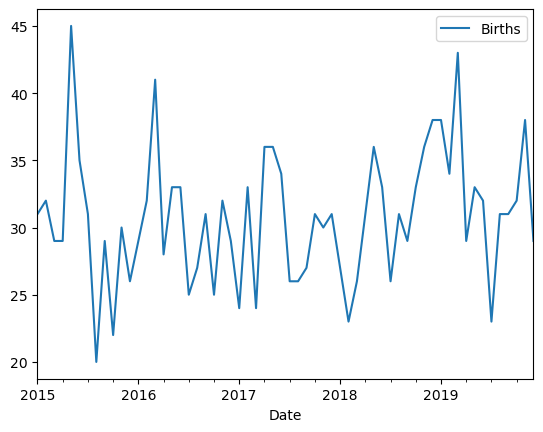

In [132]:
plt.figure(figsize=(10,8))
df.plot()
plt.show()

In [133]:
birth_count=df['Births']

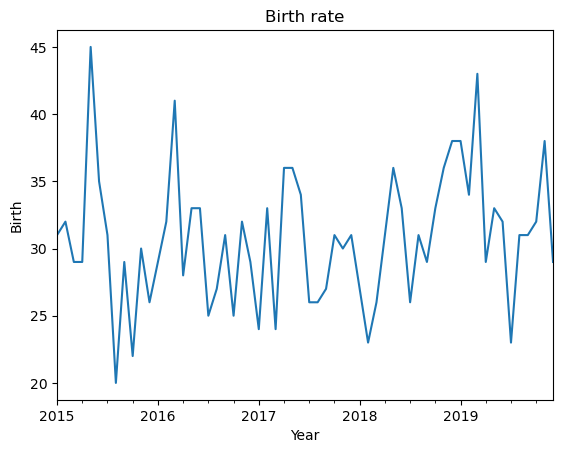

In [134]:
birth_count.plot()
plt.xlabel("Year")
plt.ylabel("Birth")
plt.title("Birth rate")
plt.show()

Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder#

In [214]:
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates

In [217]:
decompose=sm.tsa.seasonal_decompose(birth_count,model='multiplicative',extrapolate_trend=20)


Text(0.5, 0.98, 'Decompose')

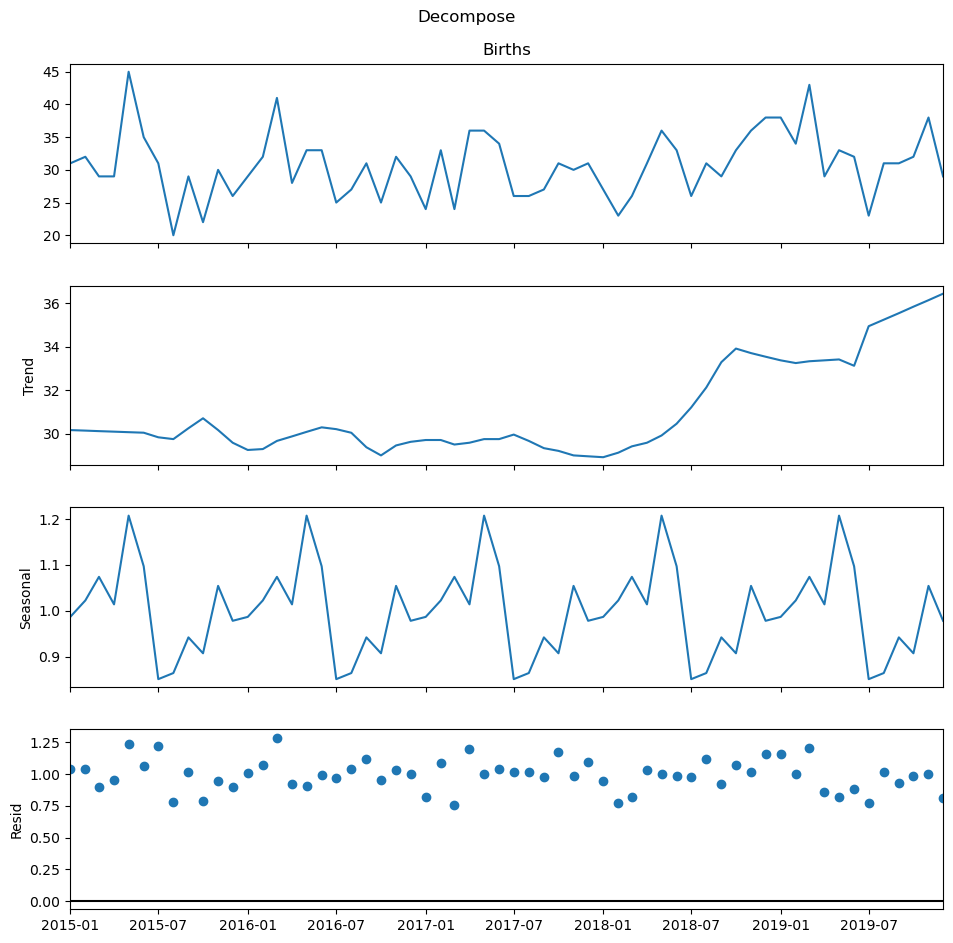

In [218]:
fig=decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Decompose")



In [140]:
train_size=int(len(df)*0.8)

In [141]:
train_size

48

In [142]:
df.shape

(60, 1)

In [143]:
train,test=df.iloc[:train_size],df.iloc[train_size:]

In [145]:
train.shape

(48, 1)

In [146]:
test.shape

(12, 1)

Check if model is stationary or not 

In [219]:
def check_stationary(df2):
    result=adfuller(df2)
    print("T Statestic",result[0])
    print("p-value",result[1])
    for key,value in result[4].items():
        print(f'Critical Value ({key}):{value}')
        print(result[0]>value)
    return result[1]

p_value=check_stationary(train)
print("-------------------------",p_value>0.05)
if p_value>0.05:
        print("hi")
        train_diff=train.diff().dropna()   
        test_diff=test.diff().dropna()
        p_value_diff=check_stationary(train_diff) 
        print("p-value after differnce",p_value_diff)   
else:
        print("hi2")
        train_diff=train 
        test_diff=test          
              
              
              

T Statestic -5.512718094693854
p-value 1.9557325344882724e-06
Critical Value (1%):-3.5778480370438146
False
Critical Value (5%):-2.925338105429433
False
Critical Value (10%):-2.6007735310095064
False
------------------------- False
hi2


Reject Null hypothesys so the time series is stationary

In [163]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [195]:
arima_model=ARIMA(train_diff['Births'],order=(5,1,1))
arima_model_fit=arima_model.fit()
# Forecast
arima_forecast = arima_model_fit.forecast(steps=len(test_diff))

C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [176]:
sarima_model=SARIMAX(train_diff['Births'],oder=(1,1,1),seasonal_order=(1,1,1,12))
sarima_model_fit=sarima_model.fit(disp=False)
sarima_forcast=sarima_model_fit.forecast(steps=len(test_diff))

C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['oder']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE (Root Mean Squared Error): Measures the average magnitude of the errors. It’s the square root of the average of squared differences between prediction and actual observation.
MAE (Mean Absolute Error): Measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation.
MAPE (Mean Absolute Percentage Error): Measures the accuracy of a forecasting method as a percentage. It’s the average of the absolute percentage errors.

In [177]:
#evaluation

def evaluation(actual,predicted):
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    mape=np.mean(np.abs((actual-predicted)/actual))*100
    return rmse,mae,mape

RMSE,MAE,MAPE=evaluation(test_diff['Births'],arima_forecast)
print("ARIMA RMSE",RMSE)
print("ARIMA MAE",MAE)
print("ARIMA MAPE",MAPE)

RMSE,MAE,MAPE=evaluation(test_diff['Births'],sarima_forcast)
print("sarima RMSE",RMSE)
print("sarima MAE",MAE)
print("sarima MAPE",MAPE)


ARIMA RMSE 5.523349660940962
ARIMA MAE 4.3092331220979405
ARIMA MAPE 13.598489296279567
sarima RMSE 8.156033898321112
sarima MAE 6.11067939931213
sarima MAPE 17.564948811543477


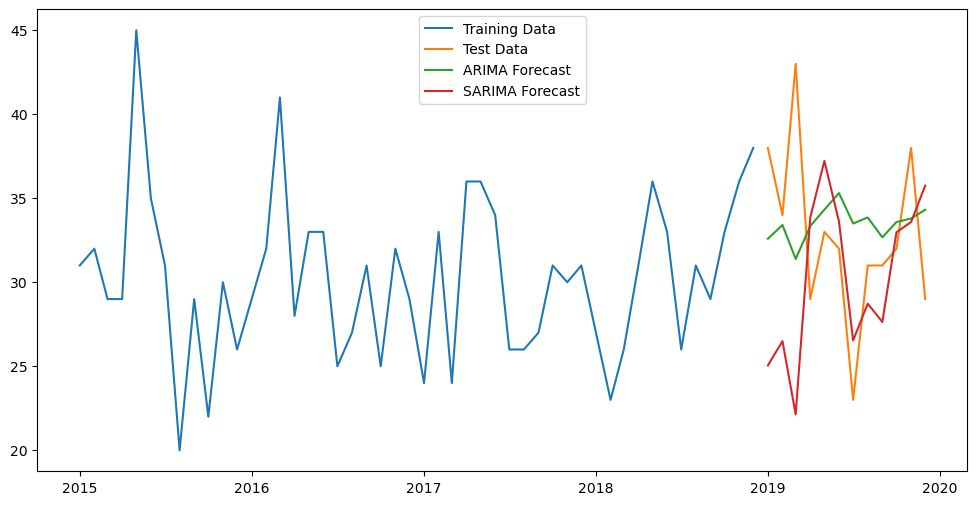

In [196]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_diff.index, train_diff['Births'], label='Training Data')
plt.plot(test_diff.index, test_diff['Births'], label='Test Data')
plt.plot(test_diff.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test_diff.index, sarima_forcast, label='SARIMA Forecast')
plt.legend()
plt.show()

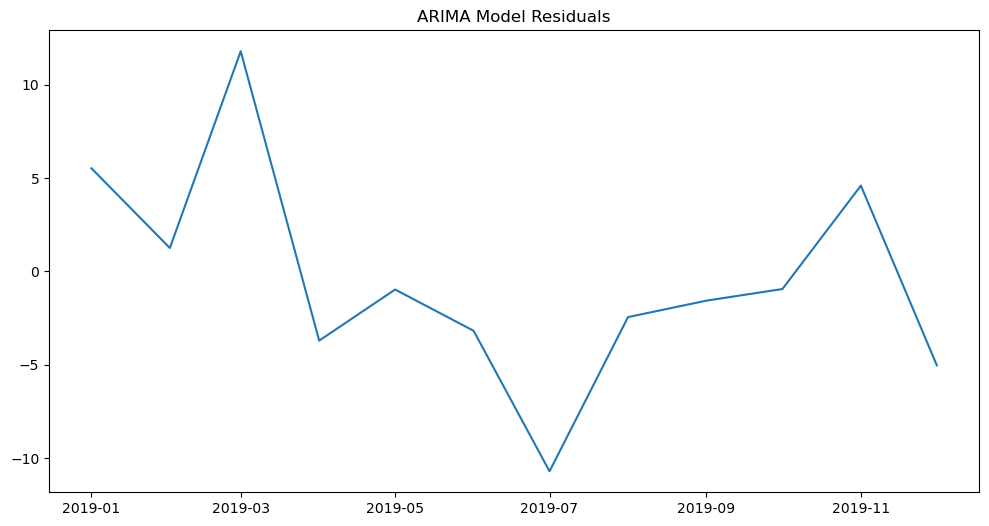

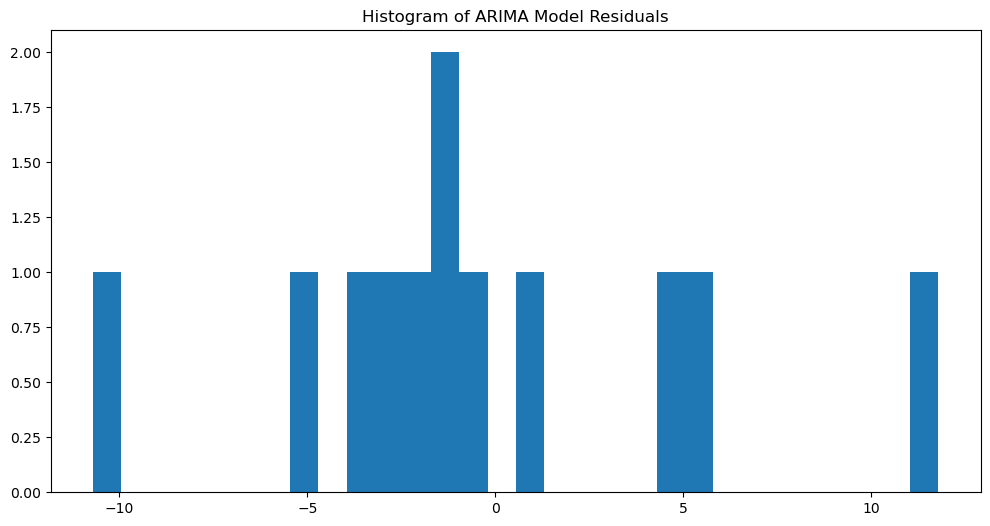

In [182]:
# Calculate residuals
arima_residuals = test['Births'] - arima_forecast

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(arima_residuals)
plt.title('ARIMA Model Residuals')
plt.show()


# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(arima_residuals, bins=30)
plt.title('Histogram of ARIMA Model Residuals')
plt.show()


In [189]:
specific_date = '2020-12-01	'
specific_date = pd.to_datetime(specific_date)

In [190]:
steps_ahead = (specific_date - train_diff.index[-1]).days

In [191]:
steps_ahead

731

In [192]:
specific_forecast = arima_model_fit.forecast(steps=steps_ahead)

In [193]:
forecasted_value = specific_forecast.iloc[-1]


In [194]:
print(f"Forecasted birth rate for {specific_date.date()}: {forecasted_value}")

Forecasted birth rate for 2020-12-01: 33.45161685771162
